In [1]:
import numpy as np
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/SuvroBaner/Python-for-Data-Science-and-Machine-Learning-Bootcamp/master/9.%20Data-Capstone-Projects/911.csv'
data = pd.read_csv(url)

In [3]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
data['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [6]:
data['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [7]:
data['title'].nunique()

110

In [12]:
data['reason'] = data['title'].apply(lambda x: x.split(':')[0])

In [13]:
data['reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: reason, Length: 99492, dtype: object

In [14]:
data['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

In [18]:
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

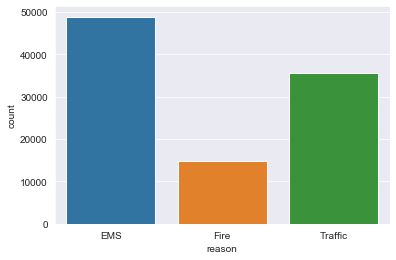

In [19]:
sns.countplot(data['reason'])

In [20]:
type(data['timeStamp'].iloc[0])

str

In [22]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [67]:
data['hour'] = data['timeStamp'].apply(lambda time: time.hour)
data['month'] = data['timeStamp'].apply(lambda time: time.month)
data['day of week'] = data['timeStamp'].apply(lambda time: time.dayofweek)

In [68]:
data['day of week']

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: day of week, Length: 99492, dtype: int64

In [69]:
dmap = {0: 'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
data['day of week'] = data['day of week'].map(dmap)

In [60]:
mmap = {0:'Jan', 1:'Feb', 2:'Mar', 3:'Apr', 4:'May', 5:'Jun', 6:'Jul', 7:'Aug', 8:'Sept', 9:'Oct', 
       10:'Nov', 11:'Dec'}
data['month'] = data['month'].map(mmap)

In [44]:
import matplotlib.pyplot as plt

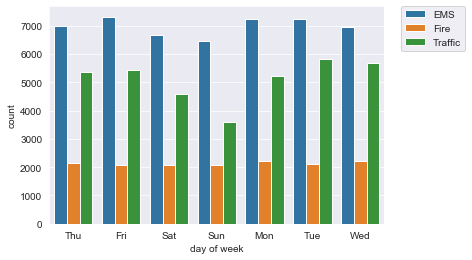

In [70]:
sns.countplot(data['day of week'], hue = data['reason'])

plt.legend(bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad=0)

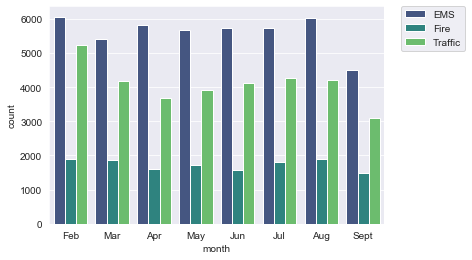

In [63]:
sns.countplot(data['month'], hue = data['reason'], palette = 'viridis')

plt.legend(bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad=0)

In [88]:
byMonth = data.groupby('month').count()

In [86]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day 0f week,day of week
month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


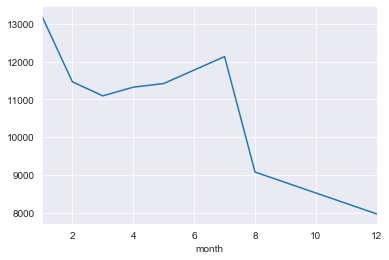

In [89]:
byMonth['twp'].plot()

In [90]:
byMonth.reset_index()

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day 0f week,day of week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


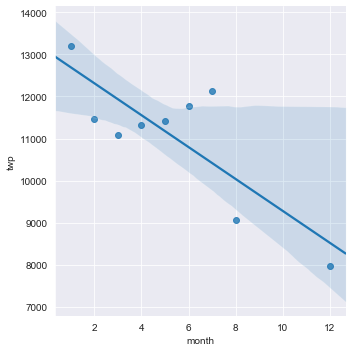

In [91]:
sns.lmplot(x = 'month', y = 'twp', data = byMonth.reset_index())

In [96]:
data['date'] = data['timeStamp'].apply(lambda time: time.date())

In [97]:
data['date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: date, Length: 99492, dtype: object

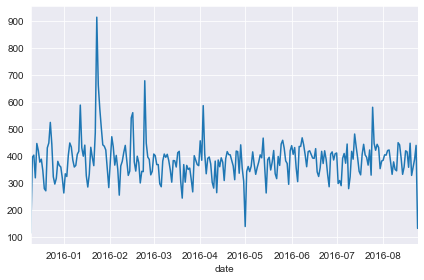

In [100]:
data.groupby('date').count()['twp'].plot()

plt.tight_layout()

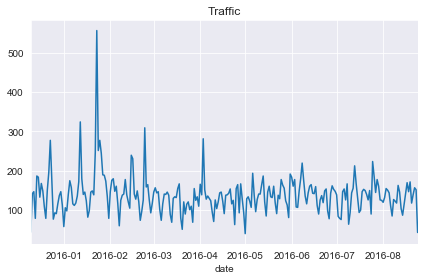

In [108]:
data[data['reason'] == 'Traffic'].groupby('date').count()['twp'].plot()

plt.title('Traffic')
plt.tight_layout()

In [111]:
data['reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

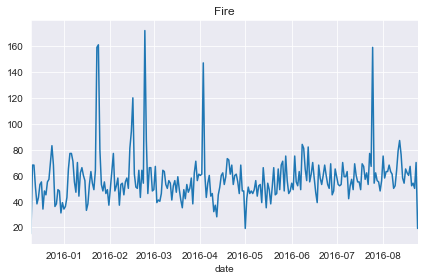

In [115]:
data[data['reason'] == 'Fire'].groupby('date').count()['twp'].plot()

plt.title('Fire')
plt.tight_layout()

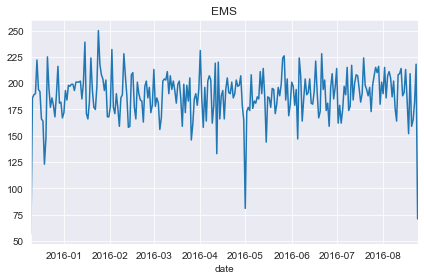

In [117]:
data[data['reason'] == 'EMS'].groupby('date').count()['twp'].plot()

plt.title('EMS')
plt.tight_layout()

In [124]:
dowhour = data.groupby(by = ['day of week', 'hour']).count()['reason'].unstack()

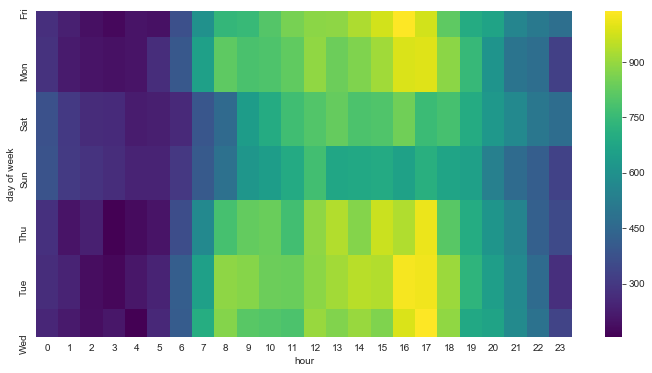

In [148]:
plt.figure(figsize = (12,6))

sns.heatmap(dowhour, cmap = 'viridis')

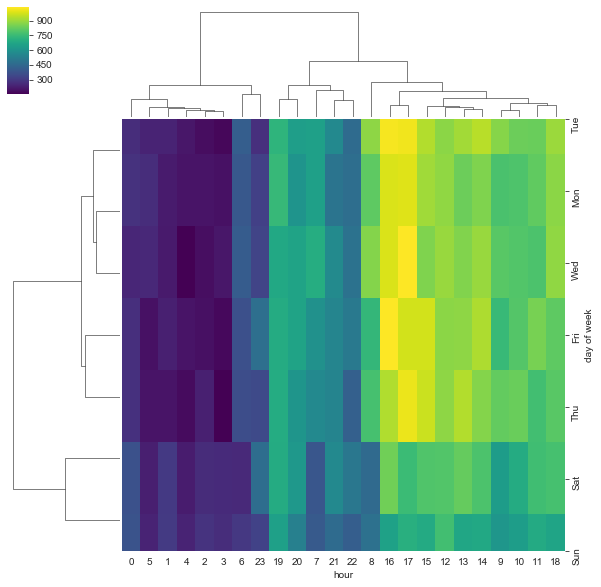

In [128]:
sns.clustermap(dowhour, cmap = 'viridis')

In [135]:
monhour = data.groupby(by = ['day of week','month']).count()['reason'].unstack()

In [136]:
monhour.head(3)

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978


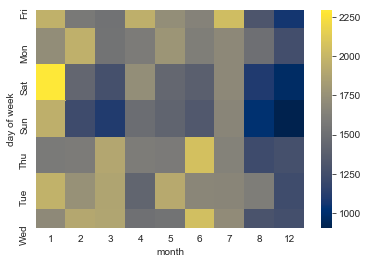

In [138]:
sns.heatmap(monhour, cmap = 'cividis')

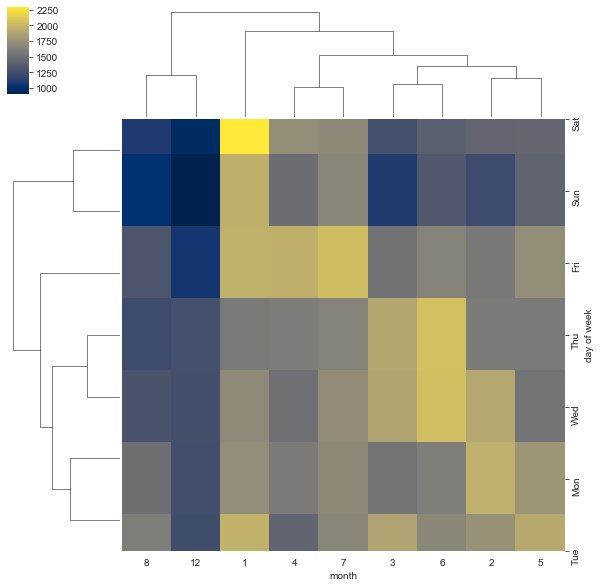

In [139]:
sns.clustermap(monhour, cmap = 'cividis')

In [149]:
data.groupby(by = ['month', 'hour']).count()['reason'].unstack()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
1,294,218,225,205,205,214,386,551,755,752,...,775,691,725,871,798,687,592,507,421,345
2,267,194,161,149,161,213,325,550,597,603,...,648,704,692,674,693,578,518,453,426,327
3,214,181,194,149,152,181,291,487,556,614,...,672,707,782,676,600,547,493,402,359,273
4,243,204,170,161,179,178,316,482,613,598,...,705,728,767,728,646,533,472,377,309,282
5,255,195,158,173,160,196,254,439,605,644,...,640,746,728,787,608,510,489,462,405,283
6,229,192,168,157,148,172,290,436,565,630,...,726,767,817,769,693,563,496,456,399,306
7,241,224,181,188,177,196,279,431,545,635,...,791,744,815,826,675,652,583,481,433,292
8,219,182,166,135,131,144,188,326,466,465,...,552,612,656,564,476,419,373,345,245,247
12,150,131,126,118,105,135,184,268,342,373,...,488,455,508,622,573,419,361,305,286,204


In [150]:
#FINANCIAL PROJECT EXERCISE

In [164]:
from pandas_datareader import data, wb
import datetime
from datetime import date

In [165]:
import pandas_datareader
print(pandas_datareader.__version__)

0.8.1


In [162]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [166]:
BAC = data.DataReader("BAC", 'yahoo', start, end)

In [167]:
C = data.DataReader('C', 'yahoo', start, end)

In [168]:
GS = data.DataReader('GS', 'yahoo', start, end)

In [169]:
JPM = data.DataReader('JPM', 'yahoo', start, end)

In [170]:
MS = data.DataReader('MS', 'yahoo', start, end)

In [171]:
WFC = data.DataReader('WFC', 'yahoo', start, end)

In [172]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [174]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis = 1, keys = tickers)

In [175]:
bank_stocks.columns.name = ['Bank Ticker', 'Stock Info']

In [176]:
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.054218   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.681938   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.726604   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.674480   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.696808   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  37.399338  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  37.424999  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  37.527611  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  37.566090  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  37.963749  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.408512  
2006-01-04  31.530001  10870000.0  20.171795  
2006-01-05  31.495001  10158000.0  20.149401  
2006-01-06  31.680000   8403800.0  20.267757  
2006-01-09  31.674999   5619600.0  20.264565  

[5 rows x 36 columns]